In [1]:
import pandas as pd
import numpy as np

In [2]:
myfile ='Bigdataacetaldehyde.xlsx'

In [3]:
data= pd.read_excel(myfile)

In [4]:
data.head()

,R,G,B,ppm,dye name
0,0.990000,1.778000,0.571000,10,Methyl red
1,1.367000,0.555000,1.248000,10,Methyl red
2,0.148000,2.355000,0.478900,10,Methyl red
3,1.234145,2.007775,0.715740,10,Methyl red
4,1.421476,0.993434,1.469432,10,Methyl red


In [5]:
data.rename(columns={
    'R': 'Delta_R',
    'G': 'Delta_G',
    'B': 'Delta_B',
    'ppm': 'Concentration_ppm',
    'dye name': 'Dye_Name'
}, inplace=True)

In [6]:
data.head()

,Delta_R,Delta_G,Delta_B,Concentration_ppm,Dye_Name
0,0.990000,1.778000,0.571000,10,Methyl red
1,1.367000,0.555000,1.248000,10,Methyl red
2,0.148000,2.355000,0.478900,10,Methyl red
3,1.234145,2.007775,0.715740,10,Methyl red
4,1.421476,0.993434,1.469432,10,Methyl red


In [7]:
myfile2 = "Initial RGB.xlsx"

In [8]:
rgb=pd.read_excel(myfile2)

In [9]:
rgb.head()

,Dye name,Methyl red,Bromocresol purple,Chlorophenol red,Bromocresol green,Bromophenol blue,Methyl orange,Metanil yellow,Crystal violet,Indigo carmine,...,Thymol blue,Neutral red,Pyrocatechol violet,m-cresol purple,Congo red,Alizarin,Acridine orange,Methyl thymol blue,Nitrazine yellow,Phenol red
0,initial R,174.937,101.317,45.717,14.814,30.328,189.720,192.389,38.834,180.446,...,189.360,88.934,170.812,182.983,192.407,75.013,192.651,185.910,159.760,201.617
1,initia G,36.525,122.143,35.687,56.779,33.692,171.744,157.623,17.696,185.901,...,175.483,37.199,122.533,190.580,139.647,49.001,156.387,82.779,139.476,160.347
2,initia B,9.558,27.849,28.429,63.313,87.031,4.143,0.241,121.416,149.267,...,27.923,15.694,5.645,118.825,137.021,33.795,0.456,7.605,19.188,14.785


In [10]:
mainrgb=rgb.T

In [11]:
mainrgb=mainrgb.reset_index()
mainrgb.columns=mainrgb.iloc[0]
mainrgb= mainrgb[1:]
mainrgb.head()

,Dye name,initial R,initia G,initia B
1,Methyl red,174.937,36.525,9.558
2,Bromocresol purple,101.317,122.143,27.849
3,Chlorophenol red,45.717,35.687,28.429
4,Bromocresol green,14.814,56.779,63.313
5,Bromophenol blue,30.328,33.692,87.031


In [12]:
mainrgb.columns=["Dye_Name","Ro","Go","Bo"]

In [13]:
mainrgb.head()

,Dye_Name,Ro,Go,Bo
1,Methyl red,174.937,36.525,9.558
2,Bromocresol purple,101.317,122.143,27.849
3,Chlorophenol red,45.717,35.687,28.429
4,Bromocresol green,14.814,56.779,63.313
5,Bromophenol blue,30.328,33.692,87.031


In [14]:
newdata=pd.merge(data,mainrgb,on="Dye_Name",how="left")

In [15]:
newdata.head()

,Delta_R,Delta_G,Delta_B,Concentration_ppm,Dye_Name,Ro,Go,Bo
0,0.990000,1.778000,0.571000,10,Methyl red,174.937,36.525,9.558
1,1.367000,0.555000,1.248000,10,Methyl red,174.937,36.525,9.558
2,0.148000,2.355000,0.478900,10,Methyl red,174.937,36.525,9.558
3,1.234145,2.007775,0.715740,10,Methyl red,174.937,36.525,9.558
4,1.421476,0.993434,1.469432,10,Methyl red,174.937,36.525,9.558


In [16]:
nan_rows = newdata[newdata.isna().any(axis=1)]

# Display the rows with NaN
print(nan_rows)

Empty DataFrame
Columns: [Delta_R, Delta_G, Delta_B, Concentration_ppm, Dye_Name, Ro, Go, Bo]
Index: []


In [17]:
contains_nan = newdata.isna().any().any()

# Display the result
if contains_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain NaN values.")

The DataFrame does not contain NaN values.


In [18]:
newdata.head()

,Delta_R,Delta_G,Delta_B,Concentration_ppm,Dye_Name,Ro,Go,Bo
0,0.990000,1.778000,0.571000,10,Methyl red,174.937,36.525,9.558
1,1.367000,0.555000,1.248000,10,Methyl red,174.937,36.525,9.558
2,0.148000,2.355000,0.478900,10,Methyl red,174.937,36.525,9.558
3,1.234145,2.007775,0.715740,10,Methyl red,174.937,36.525,9.558
4,1.421476,0.993434,1.469432,10,Methyl red,174.937,36.525,9.558


In [19]:
newdata['New Sensitivity'] = ((newdata["Delta_R"]+newdata["Delta_G"]+newdata["Delta_B"])/(newdata["Ro"]+ newdata["Go"]+ newdata["Bo"]))*100

In [20]:
newdata.head()

,Delta_R,Delta_G,Delta_B,Concentration_ppm,Dye_Name,Ro,Go,Bo,New Sensitivity
0,0.990000,1.778000,0.571000,10,Methyl red,174.937,36.525,9.558,1.510723
1,1.367000,0.555000,1.248000,10,Methyl red,174.937,36.525,9.558,1.434259
2,0.148000,2.355000,0.478900,10,Methyl red,174.937,36.525,9.558,1.349154
3,1.234145,2.007775,0.715740,10,Methyl red,174.937,36.525,9.558,1.790635
4,1.421476,0.993434,1.469432,10,Methyl red,174.937,36.525,9.558,1.757461


In [21]:
dye_sensitivity = newdata.groupby(['Dye_Name'])['New Sensitivity'].mean().reset_index()
dye_sensitivity = dye_sensitivity.sort_values(by='New Sensitivity', ascending=False)

# Display top 5 dyes
top_5_dyes = dye_sensitivity.head(5)
print(top_5_dyes)

              Dye_Name New Sensitivity
4   Bromocresol purple       45.988369
11         Fluorescein       22.046186
5     Bromophenol blue       18.050325
3    Bromocresol green       15.517614
10      Crystal violet       15.448684


In [22]:
null_rows = newdata[newdata['New Sensitivity'].isna()]

# Print the rows with NaN values in 'New Sensitivity'
print(null_rows)

Empty DataFrame
Columns: [Delta_R, Delta_G, Delta_B, Concentration_ppm, Dye_Name, Ro, Go, Bo, New Sensitivity]
Index: []


In [23]:
print(newdata['New Sensitivity'].dtype)

object


In [24]:
newdata['New Sensitivity'] = pd.to_numeric(newdata['New Sensitivity'], errors='coerce')

In [25]:
null_rows = newdata[newdata['New Sensitivity'].isna()]

# Print the rows with NaN values in 'New Sensitivity'
print(null_rows)

Empty DataFrame
Columns: [Delta_R, Delta_G, Delta_B, Concentration_ppm, Dye_Name, Ro, Go, Bo, New Sensitivity]
Index: []


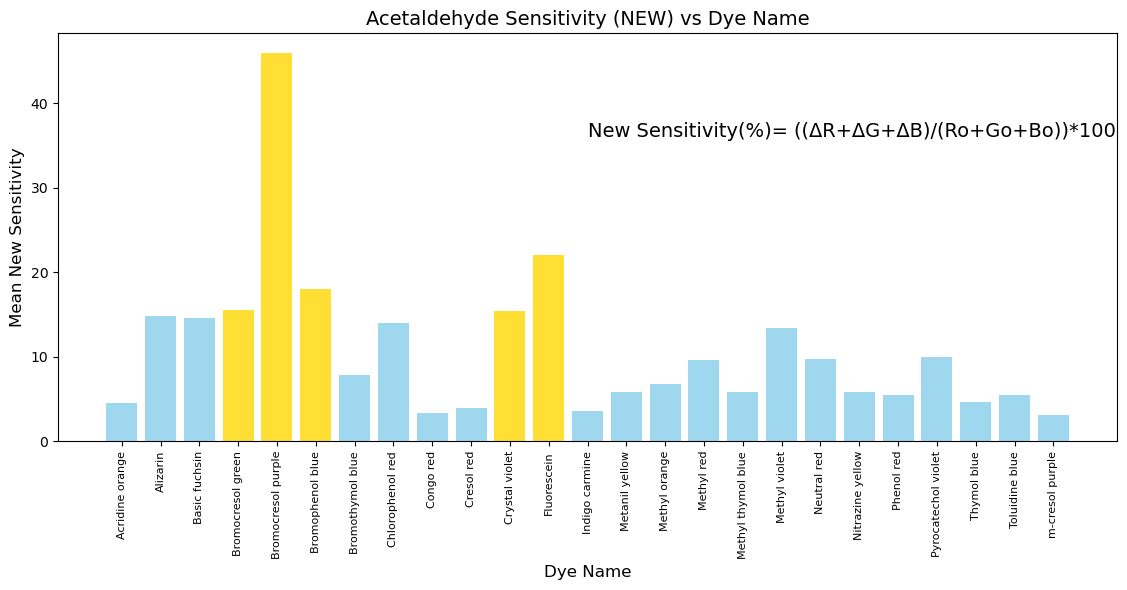

In [26]:
import matplotlib.pyplot as plt

# Calculate mean sensitivity for each dye
new_sensitivity_plot_data = newdata.groupby('Dye_Name')['New Sensitivity'].mean().reset_index()

# Sort by Dye_Name alphabetically for consistent plotting
new_sensitivity_plot_data.sort_values(by='Dye_Name', inplace=True)

# Find the top 5 dyes by sensitivity
top_5_dyes = new_sensitivity_plot_data.nlargest(5, 'New Sensitivity')

# Assign colors: highlight top 5 bars
colors = ['gold' if dye in top_5_dyes['Dye_Name'].values else 'skyblue' for dye in new_sensitivity_plot_data['Dye_Name']]

# Plot sensitivity vs Dye_Name
plt.figure(figsize=(12, 6))
plt.text(12, 36, "New Sensitivity(%)= ((ΔR+ΔG+ΔB)/(Ro+Go+Bo))*100", fontsize=14, color='black')
plt.bar(new_sensitivity_plot_data['Dye_Name'], new_sensitivity_plot_data['New Sensitivity'], color=colors, alpha=0.8)
plt.xlabel('Dye Name', fontsize=12)
plt.ylabel('Mean New Sensitivity', fontsize=12)
plt.title('Acetaldehyde Sensitivity (NEW) vs Dye Name', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()


In [27]:
# List of top 5 dyes
top_5_dyes = ['Bromocresol purple', 'Fluorescein', 'Bromophenol blue', 'Bromocresol green', 'Crystal violet']

# Filter data for these dyes
filtered_data = newdata[newdata['Dye_Name'].isin(top_5_dyes)]

In [28]:
# Check the filtered data
print(filtered_data['Dye_Name'].value_counts())

Dye_Name
Bromocresol purple    70
Bromocresol green     70
Bromophenol blue      70
Crystal violet        70
Fluorescein           70
Name: count, dtype: int64


In [29]:
# Create a dictionary to store individual datasets
dye_data = {dye: filtered_data[filtered_data['Dye_Name'] == dye] for dye in top_5_dyes}

# Verify the separation
for dye, df in dye_data.items():
    print(f"{dye}: {df.shape[0]} rows")

Bromocresol purple: 70 rows
Fluorescein: 70 rows
Bromophenol blue: 70 rows
Bromocresol green: 70 rows
Crystal violet: 70 rows


In [30]:
for dye, df in dye_data.items():
    file_name = f"{dye.replace(' ', '_')}_data.xlsx"
    df.to_excel(file_name, index=False)
    print(f"Saved {dye} data to {file_name}")

Saved Bromocresol purple data to Bromocresol_purple_data.xlsx
Saved Fluorescein data to Fluorescein_data.xlsx
Saved Bromophenol blue data to Bromophenol_blue_data.xlsx
Saved Bromocresol green data to Bromocresol_green_data.xlsx
Saved Crystal violet data to Crystal_violet_data.xlsx


In [31]:
bromocresol_purple_data = dye_data['Bromocresol purple']

In [32]:
bromocresol_purple_data.head()

,Delta_R,Delta_G,Delta_B,Concentration_ppm,Dye_Name,Ro,Go,Bo,New Sensitivity
70,7.894000,5.858000,2.137000,10,Bromocresol purple,101.317,122.143,27.849,6.322495
71,9.489000,7.148000,4.355800,10,Bromocresol purple,101.317,122.143,27.849,8.353382
72,10.248000,6.148000,3.155000,10,Bromocresol purple,101.317,122.143,27.849,7.779666
73,8.082298,6.307611,2.506304,10,Bromocresol purple,101.317,122.143,27.849,6.723282
74,9.709764,7.378753,4.598596,10,Bromocresol purple,101.317,122.143,27.849,8.629660


In [33]:
bromocresol_purple_data = pd.concat([
    bromocresol_purple_data[bromocresol_purple_data['Concentration_ppm'] == 0],
    bromocresol_purple_data[bromocresol_purple_data['Concentration_ppm'] != 0]
])
bromocresol_purple_data.reset_index(drop=True, inplace=True)
bromocresol_purple_data.head(15)

,Delta_R,Delta_G,Delta_B,Concentration_ppm,Dye_Name,Ro,Go,Bo,New Sensitivity
0,1.673000,4.183000,1.128000,0,Bromocresol purple,101.317,122.143,27.849,2.779049
1,1.055500,3.054000,0.565522,0,Bromocresol purple,101.317,122.143,27.849,1.860268
2,0.165000,2.054000,2.022200,0,Bromocresol purple,101.317,122.143,27.849,1.687643
3,1.886014,4.185951,1.337862,0,Bromocresol purple,101.317,122.143,27.849,2.948493
4,1.467074,3.059688,0.781550,0,Bromocresol purple,101.317,122.143,27.849,2.112265
5,0.408833,2.464314,2.406554,0,Bromocresol purple,101.317,122.143,27.849,2.100880
6,2.163821,4.406489,1.625165,0,Bromocresol purple,101.317,122.143,27.849,3.261115
7,1.519760,3.252765,0.996939,0,Bromocresol purple,101.317,122.143,27.849,2.295765
8,0.455480,2.937444,2.598617,0,Bromocresol purple,101.317,122.143,27.849,2.384133
9,2.392923,4.671674,1.844752,0,Bromocresol purple,101.317,122.143,27.849,3.545177


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
print(bromocresol_purple_data[['Delta_R', 'Delta_G', 'Delta_B', 'Concentration_ppm']].corr())

                    Delta_R   Delta_G   Delta_B  Concentration_ppm
Delta_R            1.000000  0.975785  0.633175           0.791393
Delta_G            0.975785  1.000000  0.684949           0.659740
Delta_B            0.633175  0.684949  1.000000           0.466489
Concentration_ppm  0.791393  0.659740  0.466489           1.000000


D:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tru

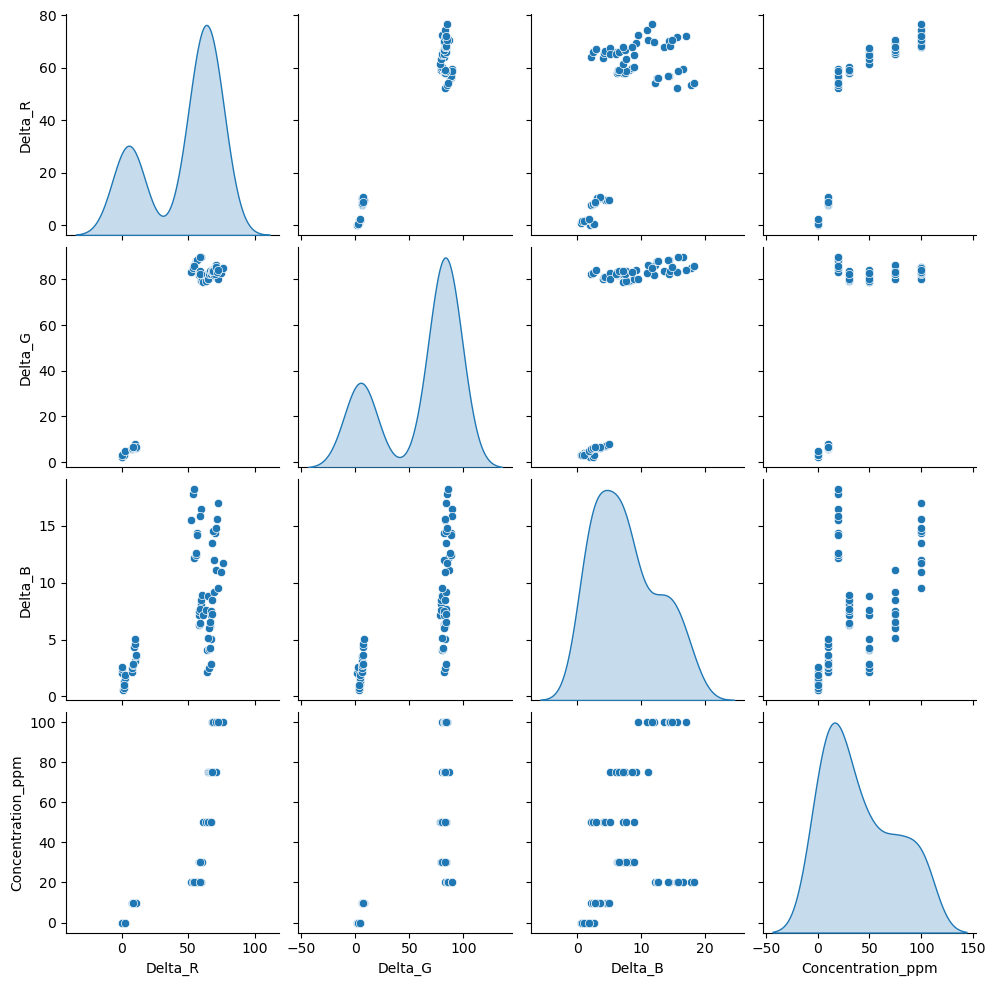

In [36]:
sns.pairplot(bromocresol_purple_data, vars=['Delta_R', 'Delta_G', 'Delta_B', 'Concentration_ppm'], diag_kind='kde')
plt.show()

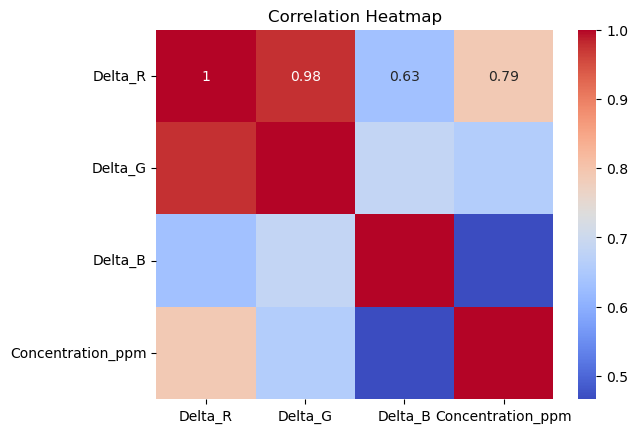

D:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tru

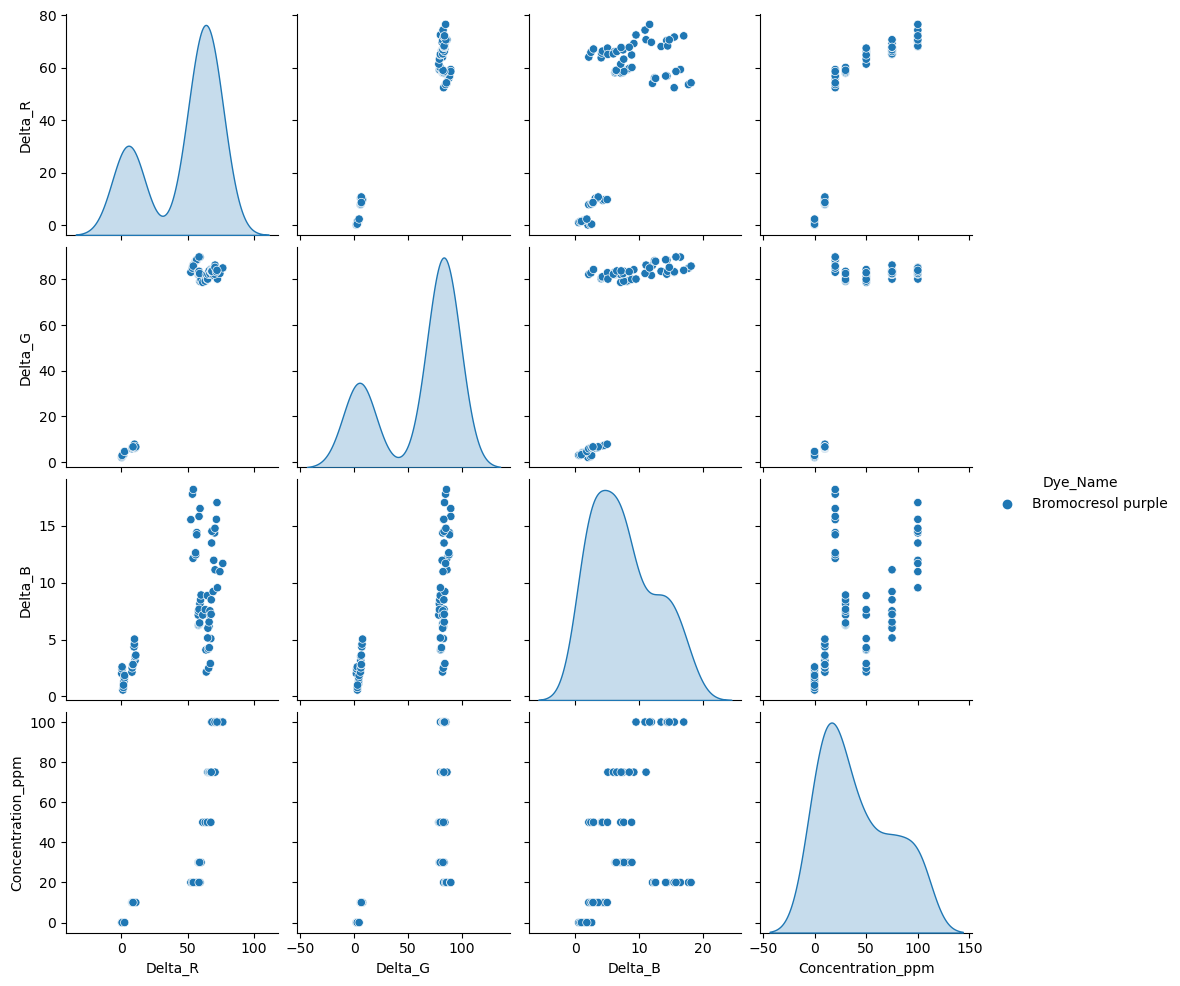

D:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


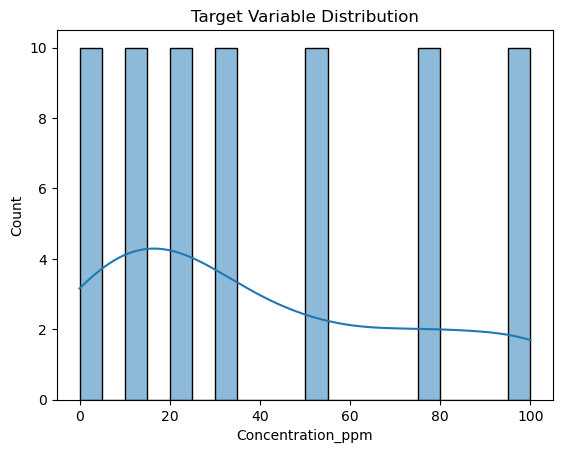

In [37]:
# Correlation Heatmap
sns.heatmap(bromocresol_purple_data[['Delta_R', 'Delta_G', 'Delta_B', 'Concentration_ppm']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(bromocresol_purple_data, vars=['Delta_R', 'Delta_G', 'Delta_B', 'Concentration_ppm'], hue='Dye_Name')
plt.show()

# Distribution of the Target
sns.histplot(bromocresol_purple_data['Concentration_ppm'], kde=True, bins=20)
plt.title('Target Variable Distribution')
plt.xlabel('Concentration_ppm')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
X = bromocresol_purple_data[['Delta_R', 'Delta_G', 'Delta_B']]  # Input variables
y = bromocresol_purple_data['Concentration_ppm']  # Target variable


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Assuming X_train and X_test are your training and testing data (features only)
# Fit and transform the training data (mean=0, std=1)
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaling parameters from training data
X_test_scaled = scaler.transform(X_test)

# Check mean and standard deviation after scaling
print("Mean of scaled training data:", np.mean(X_train_scaled, axis=0))
print("Standard deviation of scaled training data:", np.std(X_train_scaled, axis=0))

Mean of scaled training data: [-2.37904934e-17  4.12368552e-16  1.58603289e-16]
Standard deviation of scaled training data: [1. 1. 1.]


In [42]:
# Model 1: Linear Regression
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression:
MSE: 107.99940269578356
MAE: 9.217452956300624
R² Score: 0.8794024615959346


In [43]:
from sklearn.linear_model import Ridge

# Initialize and train the model
ridge_model = Ridge(alpha=0.01)  # Adjust alpha as needed
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
print("Ridge Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("R² Score:", r2_score(y_test, y_pred_ridge))

Ridge Regression:
MSE: 107.15519050197376
MAE: 9.167021084034797
R² Score: 0.8803451511842366


In [44]:
from sklearn.linear_model import RidgeCV

# Define a range of alphas
alphas = [0.01, 0.1, 1, 10, 100]

ridge_cv = RidgeCV(alphas,cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print("Best alpha:", ridge_cv.alpha_)

Best alpha: 0.01


In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Create Ridge Regression model
ridge = Ridge()

# Define scoring metric (you can use 'r2' or negative mean squared error)
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Perform Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring=scoring)
grid_search.fit(X_train_scaled, y_train)

# Best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Optimal alpha: {best_alpha}")

Optimal alpha: 0.01


In [46]:
from sklearn.linear_model import Lasso

# Initialize and train the model
lasso_model = Lasso(alpha=0.025982283477315807)  # Adjust alpha as needed
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the model
print("Lasso Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))

Lasso Regression:
MSE: 106.72755671048694
MAE: 9.140792303404167
R² Score: 0.8808226684788182


In [47]:
from sklearn.linear_model import LassoCV

# Initialize and fit the LassoCV model
lasso_cv = LassoCV(cv=5, random_state=42)  # 5-fold cross-validation
lasso_cv.fit(X_train_scaled, y_train)

# Optimal alpha found by LassoCV
print("Optimal alpha:", lasso_cv.alpha_)


Optimal alpha: 0.025982283477315807


In [48]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf= 8, min_samples_split= 8,random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R² Score:", r2_score(y_test, y_pred_dt))

y_pred_train = dt_model.predict(X_train)

# Evaluate on training data
print("Training Data Performance:")
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("R² Score:", r2_score(y_train, y_pred_train))


Decision Tree Regressor:
MSE: 43.987082628909555
MAE: 4.938186813186813
R² Score: 0.9508818219896523
Training Data Performance:
MSE: 49.29601648351649
MAE: 4.635989010989012
R² Score: 0.9566090174955455


In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 3, 4]
}
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with refined parameters
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and corresponding MSE
best_params = grid_search_dt.best_params_
best_mse = -grid_search_dt.best_score_
print("Best Parameters for DecisionTreeRegressor:", best_params)
print("Best Cross-Validation MSE:", best_mse)

# Train a Decision Tree Regressor with the best parameters
best_dt_model = DecisionTreeRegressor(**best_params, random_state=42)
best_dt_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the model on the test set
print("\nTest Data Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R² Score:", r2_score(y_test, y_pred_dt))

# Evaluate the model on the training set
y_pred_train = best_dt_model.predict(X_train)
print("\nTraining Data Performance:")
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("R² Score:", r2_score(y_train, y_pred_train))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for DecisionTreeRegressor: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Cross-Validation MSE: 54.72537878787879

Test Data Performance:
MSE: 55.80357142857143
MAE: 2.6785714285714284
R² Score: 0.9376869391824526

Training Data Performance:
MSE: 5.580357142857143
MAE: 0.44642857142857145
R² Score: 0.9950880984625748


In [50]:
# Best parameters from GridSearchCV
best_params = grid_search_dt.best_params_

# Train Decision Tree with best parameters
best_dt_model = DecisionTreeRegressor(**best_params, random_state=42)
best_dt_model.fit(X_train, y_train)

# Test on X_test
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate
print("Decision Tree (GridSearchCV Best Params):")
print("MSE:", mean_squared_error(y_test, y_pred_best_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_best_dt))
print("R² Score:", r2_score(y_test, y_pred_best_dt))

Decision Tree (GridSearchCV Best Params):
MSE: 55.80357142857143
MAE: 2.6785714285714284
R² Score: 0.9376869391824526


In [51]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, max_features='sqrt',min_samples_split= 2, min_samples_leaf= 1, max_depth= 10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

# Train the model
rf_model.fit(X_train, y_train)

# Predictions on training set
y_train_pred = rf_model.predict(X_train)

# Predictions on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate training performance
print("Training Data Performance:")
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("R² Score:", r2_score(y_train, y_train_pred))

# Evaluate test performance
print("\nTest Data Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation results
print("Cross-validation MSE scores:", -cv_scores)
print("Average Cross-validation MSE:", -cv_scores.mean())

Random Forest Regressor:
MSE: 48.8816121031746
MAE: 3.889880952380952
R² Score: 0.9454163454082198
Training Data Performance:
MSE: 12.894590773809528
MAE: 2.4303571428571433
R² Score: 0.9886500167238552

Test Data Performance:
MSE: 48.8816121031746
MAE: 3.889880952380952
R² Score: 0.9454163454082198
Cross-validation MSE scores: [ 99.66456019  60.77931818 108.72227273  86.53477273 101.12068182]
Average Cross-validation MSE: 91.36432112794613


In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 150, 200],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Min samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Max features used to split a node
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


D:\PYTHON\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
534 fits failed with the following error:
Traceback (most recent call last):
  File "D:\PYTHON\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\PYTHON\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\PYTHON\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\PYTHON\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_co

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_iter=100, cv=10, scoring='neg_mean_squared_error', verbose=1, random_state=42, n_jobs=-1)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters for RandomForestRegressor:", random_search_rf.best_params_)
print("Best MSE Score:", -random_search_rf.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters for RandomForestRegressor: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best MSE Score: 52.300775


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
bromocresol_purple_data.head()

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, 
                         min_child_weight=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions on training and test data
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Regressor:")

# Calculate MSE, MAE, and R² for both training and test sets
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Print the results
print("Training Data Performance:")
print("MSE:", train_mse)
print("MAE:", train_mae)
print("R² Score:", train_r2)

print("\nTest Data Performance:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R² Score:", test_r2)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred_lr =lr_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_dtr = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb =  xgb_model.predict(X_test)

# Assuming 'y_test' is your actual target values for the test set
y_test = y_test
# Store the results in a dictionary
results = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", 
              "Decision Tree Regressor", "Random Forest Regressor", "XGBoost Regressor"],
    "MSE": [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_dtr),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_xgb),
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_dtr),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb),
    ],
    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_dtr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb),
    ]
}

# Convert the results dictionary into a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results for comparison
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# MSE Plot
results_df.set_index('Model')[['MSE']].plot(kind='bar', ax=ax[0], color='lightblue', legend=False)
ax[0].set_title('Mean Squared Error (MSE)')
ax[0].set_ylabel('MSE')

# MAE Plot
results_df.set_index('Model')[['MAE']].plot(kind='bar', ax=ax[1], color='lightcoral', legend=False)
ax[1].set_title('Mean Absolute Error (MAE)')
ax[1].set_ylabel('MAE')

# R² Plot
results_df.set_index('Model')[['R² Score']].plot(kind='bar', ax=ax[2], color='lightgreen', legend=False)
ax[2].set_title('R² Score')
ax[2].set_ylabel('R² Score')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
######USING XGBOOST#######


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X = bromocresol_purple_data[['Delta_R', 'Delta_G', 'Delta_B']]  # Input variables
y = bromocresol_purple_data['Concentration_ppm']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Assuming X_train and X_test are your training and testing data (features only)
# Fit and transform the training data (mean=0, std=1)
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaling parameters from training data
X_test_scaled = scaler.transform(X_test)

# Check mean and standard deviation after scaling
print("Mean of scaled training data:", np.mean(X_train_scaled, axis=0))
print("Standard deviation of scaled training data:", np.std(X_train_scaled, axis=0))

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=2,min_child_weight=5, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

print("XGBoost Regressor:")

# Calculating MSE, MAE, and R² for both training and test sets
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Training Data Performance:")
print("MSE:", train_mse)
print("MAE:", train_mae)
print("R² Score:", train_r2)

print("\nTest Data Performance:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R² Score:", test_r2)




In [ ]:
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and print results
print("Cross-validation MSE scores:", -cv_scores)
print("Average Cross-validation MSE:", -np.mean(cv_scores))

# Optionally, you can also calculate R² scores
cv_r2_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_r2_scores)
print("Average Cross-validation R²:", np.mean(cv_r2_scores))

from sklearn.model_selection import cross_val_score

# Cross-validation with MAE scoring
cv_mae_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Convert negative MAE to positive and print results
print("Cross-validation MAE scores:", -cv_mae_scores)
print("Average Cross-validation MAE:", -np.mean(cv_mae_scores))

In [ ]:
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and print results
print("Cross-validation MSE scores:", -cv_scores)
print("Average Cross-validation MSE:", -np.mean(cv_scores))

# Optionally, you can also calculate R² scores
cv_r2_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_r2_scores)
print("Average Cross-validation R²:", np.mean(cv_r2_scores))